### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
df = pd.read_csv('coupons.csv')

In [5]:
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
df.shape

(12684, 26)

In [7]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [9]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
df[df['car'].notnull()]['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [11]:
#too many missing values in car column to just drop
#fill with unknown
df['car'] = df['car'].fillna('Unknown')

In [12]:
df[df['Bar'].notnull()]['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [13]:
df[df['Bar'].isnull()]['Y'].value_counts()

Y
1    55
0    52
Name: count, dtype: int64

In [14]:
df[df['CoffeeHouse'].notnull()]['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [15]:
df[df['CoffeeHouse'].isnull()]['Y'].value_counts()

Y
1    110
0    107
Name: count, dtype: int64

In [16]:
df[df['CarryAway'].notnull()]['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [17]:
df[df['CarryAway'].isnull()]['Y'].value_counts()

Y
1    101
0     50
Name: count, dtype: int64

In [18]:
df[df['RestaurantLessThan20'].notnull()]['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [19]:
df[df['RestaurantLessThan20'].isnull()]['Y'].value_counts()

Y
1    89
0    41
Name: count, dtype: int64

In [20]:
df[df['Restaurant20To50'].notnull()]['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [21]:
df[df['Restaurant20To50'].isnull()]['Y'].value_counts()

Y
1    105
0     84
Name: count, dtype: int64

In [22]:
#data seems relevant to keep
#fill all na values with uknown
df = df.fillna('Unknown')

(12684, 26)

4. What proportion of the total observations chose to accept the coupon?



In [23]:
accept_percentage = (df[df['Y'] == 1][['Y']].sum() / df['Y'].shape).values[0] * 100
print('Proportion of accepted coupons: ' + str(round(accept_percentage, 2)) + '%')

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

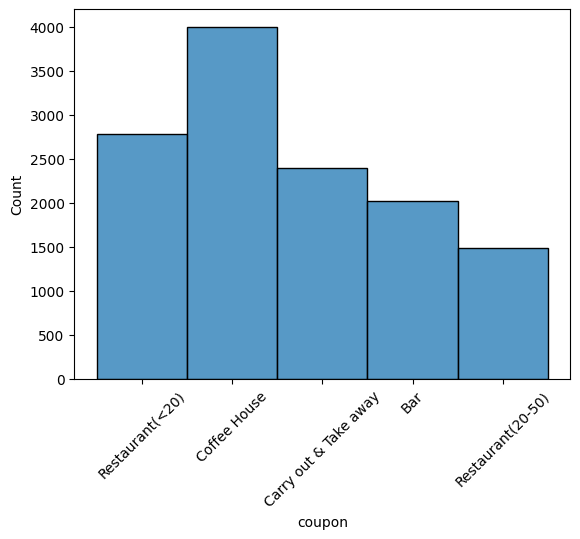

In [30]:
#fig1 = px.histogram(df, x='coupon', title='Frequency by Coupon Category', labels={'coupon': 'Coupon'})
#fig1.update_yaxes(title ='Frequency')
#fig1.show()
sns.histplot(df, x='coupon')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

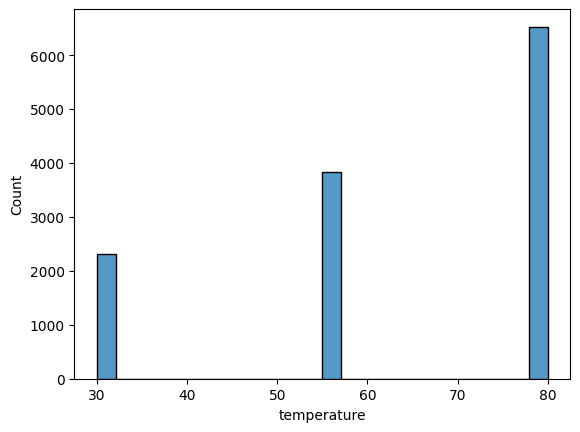

In [32]:
# fig2 = px.histogram(df, x='temperature', title='Frequency by Temperature', labels={'temperature': 'Temperature'})
# fig2.update_yaxes(title ='Frequency')
# fig2.show()
sns.histplot(df, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [33]:
coupons_bar_df = df.query('coupon == "Bar"')
coupons_bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [34]:
coupons_bar_accept_percentage = coupons_bar_df['Y'].mean() * 100
print('Percentage of bar coupons accepted: ' + str(round(coupons_bar_accept_percentage, 2)) + '%')

Percentage of bar coupons accepted: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
#get column unique values
coupons_bar_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', 'Unknown', '4~8'], dtype=object)

In [36]:
three_or_fewer_list = ['never', 'less1', '1~3']
more_than_three_list = ['4~8', 'gt8']

In [37]:
coupons_bar_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', 'Unknown', '4~8'], dtype=object)

In [38]:
coupons_accept_percentage_three_or_fewer = coupons_bar_df[coupons_bar_df['Bar'].isin(three_or_fewer_list) ]['Y'].mean() * 100
coupons_accept_percentage_more_than_three = coupons_bar_df[coupons_bar_df['Bar'].isin(more_than_three_list) ]['Y'].mean() * 100
print('Acceptance rate of those who went to a bar 3 or fewer times a month: ' + str(round(coupons_accept_percentage_three_or_fewer, 2)) + '%')
print('Acceptance rate of those who went to a bar more than 3 times a month: ' + str(round(coupons_accept_percentage_more_than_three, 2)) + '%')

Acceptance rate of those who went to a bar 3 or fewer times a month: 37.06%
Acceptance rate of those who went to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [39]:
coupons_bar_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [40]:
age_greater_than_25_list = ['46', '26', '31', '41', '50plus', '36']

In [43]:
more_than_one_list = ['1~3', '4~8', 'gt8']
more_than_one_over_25 = coupons_bar_df[(coupons_bar_df['Bar'].isin(more_than_one_list)) & (coupons_bar_df['age'].isin(age_greater_than_25_list))]
others = coupons_bar_df[~(coupons_bar_df['Bar'].isin(more_than_one_list)) & ~(coupons_bar_df['age'].isin(age_greater_than_25_list))]
accept_rate_more_than_one_over_25 = more_than_one_over_25['Y'].mean() * 100
accept_rate_others = others['Y'].mean() * 100

print('Yes, there is a difference')
print('Coupon acceptance rate for drivers who go to the bar more than once a month and are over the age of 25 is: ' + str(round(accept_rate_more_than_one_over_25, 2)) + '%')
print('Coupon acceptance rate for drivers who go to the bar less than onece a month and are under the age of 25 is: ' + str(round(accept_rate_others, 2)) + '%')

Yes, there is a difference
Coupon acceptance rate for drivers who go to the bar more than once a month and are over the age of 25 is: 69.52%
Coupon acceptance rate for drivers who go to the bar less than onece a month and are under the age of 25 is: 39.33%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [44]:
coupons_bar_df['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [45]:
coupons_bar_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [46]:
group1 = coupons_bar_df[(coupons_bar_df['Bar'].isin(more_than_one_list)) & (coupons_bar_df['passanger'] != 'Kid(s)') & (coupons_bar_df['occupation'] != 'Farming Fishing & Forestry')]
group1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [47]:
group2 = coupons_bar_df[~(coupons_bar_df['Bar'].isin(more_than_one_list)) & ~(coupons_bar_df['passanger'] != 'Kid(s)') & ~(coupons_bar_df['occupation'] != 'Farming Fishing & Forestry')]
group2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8431,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Male,41,Married partner,...,never,never,1~3,never,1,1,0,0,1,0
8432,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,41,Married partner,...,never,never,1~3,never,1,1,0,0,1,0
9565,Home,Kid(s),Sunny,30,6PM,Bar,2h,Male,31,Married partner,...,less1,less1,1~3,less1,1,1,0,0,1,1


In [48]:
accept_rate_group1 = group1['Y'].mean() * 100
accept_rate_group2 = group2['Y'].mean() * 100

print('Coupon acceptance rate for drivers who go to the bar more than once a month, had passangers that were not a kid, and had an occupation other than farming, fishing, or forestry is: ' + str(round(accept_rate_group1, 2)) + '%')
print('Coupon acceptance rate for all others is: ' + str(round(accept_rate_group2, 2)) + '%')

Coupon acceptance rate for drivers who go to the bar more than once a month, had passangers that were not a kid, and had an occupation other than farming, fishing, or forestry is: 71.32%
Coupon acceptance rate for all others is: 33.33%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [49]:
coupons_bar_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [50]:
coupons_bar_df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'Unknown', 'never'], dtype=object)

In [51]:
coupons_bar_df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [52]:
coupons_bar_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [53]:
six_group1 = coupons_bar_df[(coupons_bar_df['Bar'].isin(more_than_one_list)) & (coupons_bar_df['passanger'] != 'Kid(s)') & (coupons_bar_df['maritalStatus'] != 'Widowed')]
six_group2 = coupons_bar_df[(coupons_bar_df['Bar'].isin(more_than_one_list)) & (coupons_bar_df['age'].isin(['21', '26', 'below21']))]
six_group3 = coupons_bar_df[(coupons_bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (coupons_bar_df['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']))]

six_accept_rate_group1 = six_group1['Y'].mean() * 100
six_accept_rate_group2 = six_group2['Y'].mean() * 100
six_accept_rate_group3 = six_group3['Y'].mean() * 100

print('Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is: ' + str(round(six_accept_rate_group1, 2)) + '%')
print('Coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is: ' + str(round(six_accept_rate_group2, 2)) + '%')
print('Coupon acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is: ' + str(round(six_accept_rate_group3, 2)) + '%')

Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is: 71.32%
Coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is: 72.17%
Coupon acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, some hypotheses can be made about drivers who accept the bar coupons.

Looking at the observational stats, the first thing calculation shows that drivers that go to bars more than three times a month have a higher rate of acceptance of the bar coupon at 76.88% vs 37.06% for drivers that go to bars less than 3 times a month. The hypothesis is that drivers that frequent bars more frequently will be more likely to accept bar coupons.

The next obsevation adds on age. We specifically look at drivers that go to bars more than once a month who are over 25 and whose who go to a bar less than once a month and are under 25. The findings were 69.52% and 39.33% coupon acceptance rate respectively. From this the hypothesis is that the drivers who go to bars at least one time a month and are over 25 are more likely to accept bar coupons.

Next we look at drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. From this, the coupon acceptance rate was 71.32%. The acceptance rate is still high so it can be hypothesized that drivers who do not have kids as passengers and do not have an occupation in farming, fishing, and forestry are more likely to accept bar coupons.

Lastly we look at acceptance rate for drivers in these three categories:
- Go to bars more than once a month, had passengers that were not a kid, and were not widowed with an acceptance rate of 71.32%.
- Go to bars more than once a month and are under the age of 30 with an acceptance rate of 72.17%.
- Go to cheap restaurants more than 4 times a month and income is less than 50K with an acceptance rate of 45.35%.
From these observations, the age group of under 30 has a higher acceptance rate than previously seen with the age group of over 25. Also looking at the data for drivers who go to cheap restraunts frequently and have less than 50k income have a low acceptance rate of 45.35%.

In conclusion, with the data observed, an overall hypothesis for higher acceptance rate of bar coupons is that drivers who frequent bars more than once a month, under the age of 30, who do not have a kid as a passanger, and working in an occupation that is not farming, fishing, or forestry is more likely to accept a bar coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [54]:
df['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [55]:
coupons_coffee_house_df = df.query('coupon == "Coffee House"')
coupons_coffee_house_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,0


In [56]:
coffee_accept_rate = coupons_coffee_house_df['Y'].mean() * 100
coffee_accept_rate

49.92492492492492

In [59]:
coupons_coffee_house_df['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', 'Unknown'], dtype=object)

In [60]:
more_than_three_list = ['4~8', 'gt8']
three_or_less_list = ['never', 'less1', '1~3']

In [61]:
accept_rate_more_than_three = coupons_coffee_house_df[coupons_coffee_house_df['CoffeeHouse'].isin(more_than_three_list)]['Y'].mean() * 100
accept_rate_three_or_less = coupons_coffee_house_df[coupons_coffee_house_df['CoffeeHouse'].isin(three_or_less_list)]['Y'].mean() * 100

print('Coupon accept rate of drivers who frequent coffee houses more than 3 times a month: ' + str(round(accept_rate_more_than_three, 2)) + '%')
print('Coupon accept rate of drivers who frequent coffee houses 3 or less times a month: ' + str(round(accept_rate_three_or_less, 2)) + '%')

Coupon accept rate of drivers who frequent coffee houses more than 3 times a month: 67.5%
Coupon accept rate of drivers who frequent coffee houses 3 or less times a month: 44.94%


In [62]:
more_than_once_list = ['4~8', 'gt8', '1~3']
less_than_once_list = ['less1', 'never']

accept_rate_more_than_once = coupons_coffee_house_df[coupons_coffee_house_df['CoffeeHouse'].isin(more_than_once_list)]['Y'].mean() * 100
accept_rate_less_than_once = coupons_coffee_house_df[coupons_coffee_house_df['CoffeeHouse'].isin(less_than_once_list)]['Y'].mean() * 100

print('Coupon accept rate of drivers who frequent coffee houses more than once a month: ' + str(round(accept_rate_more_than_once, 2)) + '%')
print('Coupon accept rate of drivers who frequent coffee houses less than once a month: ' + str(round(accept_rate_less_than_once, 2)) + '%')

Coupon accept rate of drivers who frequent coffee houses more than once a month: 66.02%
Coupon accept rate of drivers who frequent coffee houses less than once a month: 34.62%


<Axes: xlabel='CoffeeHouse', ylabel='Count'>

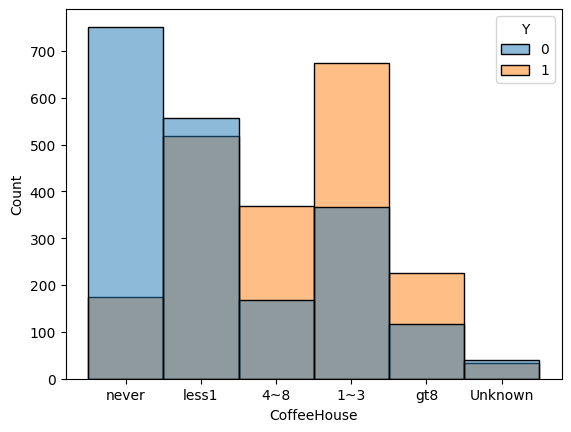

In [68]:
# px.histogram(coupons_coffee_house_df, x='CoffeeHouse', color='Y', text_auto=True)
sns.histplot(coupons_coffee_house_df, x='CoffeeHouse', hue='Y')

In [64]:
coupons_coffee_house_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [65]:
age_21_over_list = ['46', '26', '31', '41', '50plus', '36', '21']

more_than_once_21_over = coupons_coffee_house_df[(coupons_coffee_house_df['CoffeeHouse'].isin(more_than_once_list)) & (coupons_coffee_house_df['age'].isin(age_21_over_list))]['Y'].mean() * 100
under_21 = coupons_coffee_house_df[(coupons_coffee_house_df['CoffeeHouse'].isin(more_than_once_list)) & ~(coupons_coffee_house_df['age'].isin(age_21_over_list))]['Y'].mean() * 100

print('Coupon accept rate of drivers who frequent coffee houses more than once a month and are 21 or older: ' + str(round(more_than_once_21_over, 2)) + '%')
print('Coupon accept rate of drivers who frequent coffee houses more than once a month and under the age of 21: ' + str(round(under_21, 2)) + '%')

Coupon accept rate of drivers who frequent coffee houses more than once a month and are 21 or older: 65.35%
Coupon accept rate of drivers who frequent coffee houses more than once a month and under the age of 21: 76.27%


<Axes: xlabel='age', ylabel='Count'>

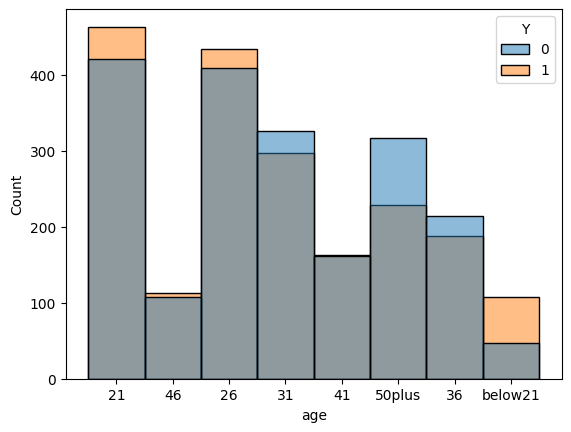

In [69]:
# fig2 = px.histogram(coupons_coffee_house_df, x='age', color='Y', text_auto=True)
# fig2.update_xaxes(categoryorder='total ascending')
# fig2.show()
sns.histplot(coupons_coffee_house_df, x='age', hue='Y')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Architecture & Engineering'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Education&Training&Library'),
  Text(4, 0, 'Healthcare Support'),
  Text(5, 0, 'Healthcare Practitioners & Technical'),
  Text(6, 0, 'Sales & Related'),
  Text(7, 0, 'Management'),
  Text(8, 0, 'Arts Design Entertainment Sports & Media'),
  Text(9, 0, 'Computer & Mathematical'),
  Text(10, 0, 'Life Physical Social Science'),
  Text(11, 0, 'Personal Care & Service'),
  Text(12, 0, 'Community & Social Services'),
  Text(13, 0, 'Office & Administrative Support'),
  Text(14, 0, 'Construction & Extraction'),
  Text(15, 0, 'Legal'),
  Text(16, 0, 'Retired'),
  Text(17, 0, 'Installation Maintenance & Repair'),
  Text(18, 0, 'Transportation & Material Moving'),
  Text(19, 0, 'Business & Financial'),
  Text(20, 0, 'Protective Service'),
  Text(21,

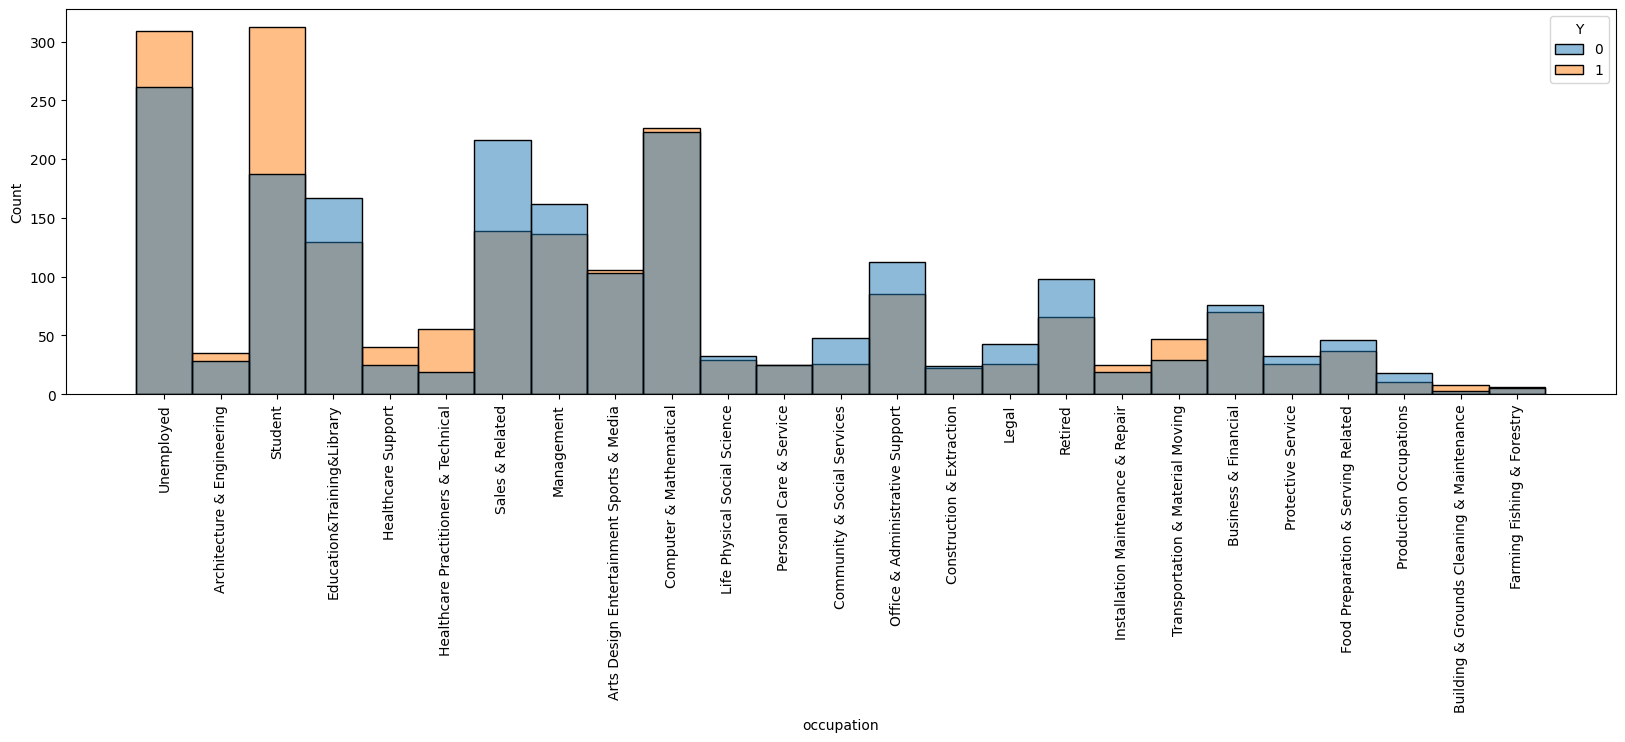

In [85]:
# fig2 = px.histogram(coupons_coffee_house_df, x='occupation', color='Y', text_auto=True)
# fig2.update_xaxes(categoryorder='total ascending')
# fig2.show()
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(coupons_coffee_house_df, x='occupation', hue='Y', ax=ax)
plt.xticks(rotation=90)

In [72]:
coupons_coffee_house_df.groupby(['occupation'])['Y'].mean().sort_values(ascending=True)

occupation
Community & Social Services                  0.351351
Production Occupations                       0.357143
Legal                                        0.376812
Sales & Related                              0.391549
Retired                                      0.402439
Office & Administrative Support              0.431472
Education&Training&Library                   0.435811
Food Preparation & Serving Related           0.445783
Protective Service                           0.448276
Management                                   0.456376
Life Physical Social Science                 0.475410
Construction & Extraction                    0.478261
Business & Financial                         0.479452
Personal Care & Service                      0.500000
Computer & Mathematical                      0.503341
Arts Design Entertainment Sports & Media     0.507177
Unemployed                                   0.542105
Farming Fishing & Forestry                   0.545455
Architecture & En

In [73]:
more_than_once_unemployed = coupons_coffee_house_df[(coupons_coffee_house_df['CoffeeHouse'].isin(more_than_once_list)) & (coupons_coffee_house_df['occupation'].isin(['Unemployed']))]['Y'].mean() * 100
more_than_once_employed = coupons_coffee_house_df[(coupons_coffee_house_df['CoffeeHouse'].isin(more_than_once_list)) & ~(coupons_coffee_house_df['occupation'].isin(['Unemployed']))]['Y'].mean() * 100

print('Coupon accept rate of drivers who frequent coffee houses more than once and are unemployed: ' + str(round(more_than_once_unemployed, 2)) + '%')
print('Coupon accept rate of drivers who frequent coffee houses more than once and are employed: ' + str(round(more_than_once_employed, 2)) + '%')

Coupon accept rate of drivers who frequent coffee houses more than once and are unemployed: 72.83%
Coupon accept rate of drivers who frequent coffee houses more than once and are employed: 64.99%


Hypothesis based on these obeservations: People who frequent coffee houses at least once a month are more likely to accept coffee house coupons. People frequent coffee houses at least once a month and are under 21 are more likely to accept coffee house coupons. People who frequent coffee houses at least once a month and are unemployed are more likely to accept coffee house coupons.